# PCOS Diagnostic Modeling and Metabolic Risk Analysis

## Research Objective

This notebook aims to develop predictive models for Polycystic Ovary Syndrome (PCOS) diagnosis using clinical, metabolic, and hormonal indicators.

The objectives of this analysis are:

1. To explore the structure and statistical properties of the PCOS dataset.
2. To identify key predictors of PCOS using machine learning models.
3. To evaluate model performance using robust validation techniques.
4. To analyze feature importance and interpretability using SHAP.
5. To later compare predictive risk factors with maternal risk modeling results.

This notebook follows the same academic modeling framework applied in the Maternal Risk analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load correct sheet
df_pcos = pd.read_excel("../data/pcos.xlsx", sheet_name="Full_new")

print("Dataset shape:", df_pcos.shape)

print("\nColumns:")
print(df_pcos.columns)

print("\nData types:")
print(df_pcos.dtypes)

print("\nFirst 5 rows:")
display(df_pcos.head())

Dataset shape: (541, 45)

Columns:
Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

Data types:
Sl. No                      int64
Patient 

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [3]:
# Clean column names (remove leading/trailing spaces)
df_pcos.columns = df_pcos.columns.str.strip()

# Drop unnecessary columns
df_pcos = df_pcos.drop(columns=["Sl. No", "Patient File No.", "Unnamed: 44"])

print("New shape:", df_pcos.shape)
print("\nColumns after cleaning:")
print(df_pcos.columns)

New shape: (541, 42)

Columns after cleaning:
Index(['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


PCOS Distribution:
PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64


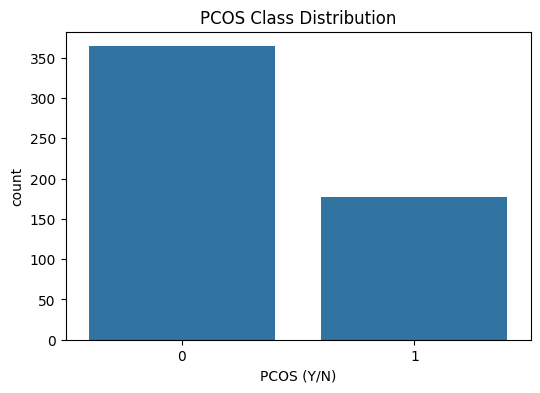

In [4]:
# Target distribution
print("PCOS Distribution:")
print(df_pcos["PCOS (Y/N)"].value_counts())

# Plot distribution
plt.figure(figsize=(6,4))
sns.countplot(x="PCOS (Y/N)", data=df_pcos)
plt.title("PCOS Class Distribution")
plt.show()

In [5]:
# Missing value check
missing = df_pcos.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Missing values per column:")
print(missing)

Missing values per column:
Marraige Status (Yrs)    1
Fast food (Y/N)          1
dtype: int64


In [7]:
# Check exact column names
print(df_pcos.columns)

Index(['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


In [8]:
# Fill numeric column with median
df_pcos["Marraige Status (Yrs)"] = df_pcos["Marraige Status (Yrs)"].fillna(
    df_pcos["Marraige Status (Yrs)"].median()
)

# Fill binary column with mode
df_pcos["Fast food (Y/N)"] = df_pcos["Fast food (Y/N)"].fillna(
    df_pcos["Fast food (Y/N)"].mode()[0]
)

print("Remaining missing values:", df_pcos.isnull().sum().sum())

Remaining missing values: 0


## Feature and Target Separation

In this step, we separate the target variable (PCOS diagnosis) from the feature matrix.

The target variable:
- **PCOS (Y/N)** — Binary outcome (0 = No PCOS, 1 = PCOS)

All remaining variables are considered predictor features for the classification task.

This separation is required before proceeding with model training and evaluation.

In [9]:
# Separate target
y_pcos = df_pcos["PCOS (Y/N)"]

# Drop target from features
X_pcos = df_pcos.drop(columns=["PCOS (Y/N)"])

print("Feature shape:", X_pcos.shape)
print("Target shape:", y_pcos.shape)

Feature shape: (541, 41)
Target shape: (541,)


## Feature Type Classification

Before model training, we classify features into groups:

1. **Binary Features (0/1)**  
   - Lifestyle indicators  
   - Clinical Yes/No variables  

2. **Continuous Numerical Features**  
   - Hormonal measurements  
   - Anthropometric measurements  
   - Blood parameters  

3. **Categorical Encoded Features**  
   - Blood Group (numerically encoded)

This classification allows appropriate preprocessing decisions such as scaling and encoding.

In [10]:
# Identify binary columns (only 0 and 1 values)
binary_cols = [
    col for col in X_pcos.columns
    if set(X_pcos[col].dropna().unique()).issubset({0, 1})
]

# Identify continuous columns
continuous_cols = [
    col for col in X_pcos.columns
    if col not in binary_cols
]

print("Binary features count:", len(binary_cols))
print(binary_cols)

print("\nContinuous features count:", len(continuous_cols))
print(continuous_cols)

Binary features count: 8
['Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

Continuous features count: 33
['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


## Refined Feature Categorization

After inspection, we adjust feature groups:

1. **Binary Features (0/1)**
   - Lifestyle and symptom indicators
   - Pregnancy status
   - Cycle regularity

2. **Categorical Feature**
   - Blood Group (encoded numerically but nominal)

3. **Continuous Numerical Features**
   - Hormonal measurements
   - Anthropometric measurements
   - Blood parameters
   - Ultrasound findings

This refined grouping ensures correct preprocessing before modeling.

In [11]:
# Add Cycle(R/I) to binary features
binary_cols.append('Cycle(R/I)')

# Remove Blood Group from continuous
if 'Blood Group' in continuous_cols:
    continuous_cols.remove('Blood Group')

categorical_cols = ['Blood Group']

print("Updated binary features:", len(binary_cols))
print(binary_cols)

print("\nCategorical features:", categorical_cols)

print("\nUpdated continuous features:", len(continuous_cols))

Updated binary features: 9
['Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Cycle(R/I)']

Categorical features: ['Blood Group']

Updated continuous features: 32


## Modeling Strategy

We implement a structured modeling approach:

Phase 1 – Baseline Models:
- Logistic Regression
- Random Forest

Phase 2 – Advanced Evaluation:
- Hyperparameter tuning
- ROC-AUC analysis
- Feature importance
- Model calibration
- SHAP interpretability

Preprocessing includes:
- Standard scaling for continuous features
- One-hot encoding for categorical variables
- No transformation for binary features

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pcos,
    y_pcos,
    test_size=0.2,
    random_state=42,
    stratify=y_pcos
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (432, 41)
Test shape: (109, 41)


## Preprocessing Pipeline Construction

To ensure robust and reproducible modeling, we construct a preprocessing pipeline using:

- StandardScaler → for continuous features
- OneHotEncoder → for categorical feature (Blood Group)
- No transformation → for binary features

We use ColumnTransformer to apply transformations selectively.

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocessor definition
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('bin', 'passthrough', binary_cols)
    ]
)

print("Preprocessing pipeline created successfully.")

Preprocessing pipeline created successfully.


## Baseline Model 1: Logistic Regression

We implement Logistic Regression as a baseline linear classifier.

Evaluation metrics:
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC
- Confusion Matrix

In [15]:
# Force continuous columns to numeric
for col in continuous_cols:
    df_pcos[col] = pd.to_numeric(df_pcos[col], errors='coerce')

# Check newly created NaNs
print("New missing after conversion:")
print(df_pcos[continuous_cols].isnull().sum().sum())

New missing after conversion:
2


In [16]:
# Fill new NaNs with median
for col in continuous_cols:
    df_pcos[col] = df_pcos[col].fillna(df_pcos[col].median())

print("Remaining missing values:", df_pcos.isnull().sum().sum())

Remaining missing values: 0


In [17]:
y_pcos = df_pcos["PCOS (Y/N)"]
X_pcos = df_pcos.drop(columns=["PCOS (Y/N)"])

print("Recreated shapes:")
print(X_pcos.shape, y_pcos.shape)

Recreated shapes:
(541, 41) (541,)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pcos,
    y_pcos,
    test_size=0.2,
    random_state=42,
    stratify=y_pcos
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (432, 41)
Test shape: (109, 41)


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        73
           1       0.84      0.89      0.86        36

    accuracy                           0.91       109
   macro avg       0.89      0.90      0.90       109
weighted avg       0.91      0.91      0.91       109

Confusion Matrix:

[[67  6]
 [ 4 32]]

ROC-AUC Score: 0.9501522070015221


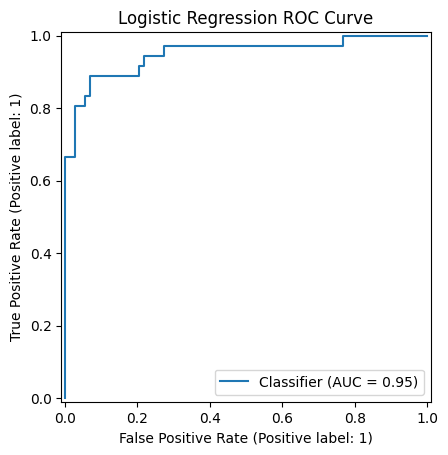

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Full modeling pipeline
log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred_log))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_log))

roc_auc = roc_auc_score(y_test, y_proba_log)
print("\nROC-AUC Score:", roc_auc)

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_log)
plt.title("Logistic Regression ROC Curve")
plt.show()

## Baseline Model 2: Random Forest Classifier

To compare linear and non-linear modeling capacity, we implement a Random Forest classifier.

Random Forest is:
- Non-linear
- Robust to scaling
- Capable of modeling complex feature interactions

We evaluate using the same metrics:
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC
- Confusion Matrix

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        73
           1       0.97      0.81      0.88        36

    accuracy                           0.93       109
   macro avg       0.94      0.90      0.91       109
weighted avg       0.93      0.93      0.92       109

Confusion Matrix:

[[72  1]
 [ 7 29]]

ROC-AUC Score: 0.9427321156773212


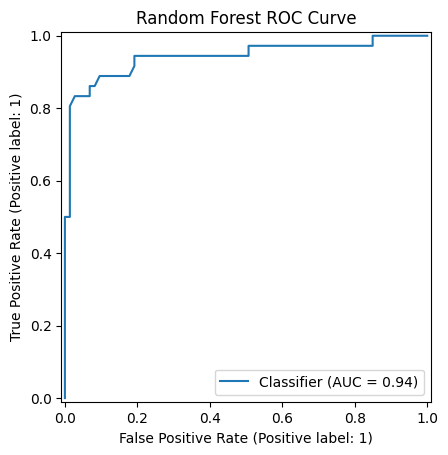

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        random_state=42
    ))
])

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("\nROC-AUC Score:", roc_auc_rf)

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_rf)
plt.title("Random Forest ROC Curve")
plt.show()

## Logistic Regression Interpretability

Since Logistic Regression achieved the best balance between recall and ROC-AUC, 
we further analyze:

- Model coefficients
- Odds ratios
- Most influential features

This allows clinical interpretation of PCOS risk factors.

In [21]:
import numpy as np
import pandas as pd

# Extract trained logistic regression model
log_clf = log_model.named_steps['classifier']

# Get feature names after preprocessing
feature_names_num = continuous_cols
feature_names_cat = log_model.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .get_feature_names_out(categorical_cols)

feature_names = list(feature_names_num) + list(feature_names_cat) + binary_cols

# Extract coefficients
coefficients = log_clf.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)
})

# Sort by absolute impact
coef_df['Abs Coef'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs Coef', ascending=False)

coef_df.head(15)

,Feature,Coefficient,Odds Ratio,Abs Coef
28,Follicle No. (R),1.701508,5.482208,1.701508
41,hair growth(Y/N),1.524832,4.594370,1.524832
42,Skin darkening (Y/N),1.281598,3.602393,1.281598
40,Weight gain(Y/N),1.170207,3.222661,1.170207
34,Blood Group_14,0.836390,2.308019,0.836390
44,Pimples(Y/N),0.798317,2.221799,0.798317
27,Follicle No. (L),0.685003,1.983778,0.685003
4,Pulse rate(bpm),0.516971,1.676940,0.516971
9,Marraige Status (Yrs),-0.477013,0.620634,0.477013
32,Blood Group_12,-0.428080,0.651759,0.428080


## Logistic Regression Coefficient Visualization

We visualize the top contributing features based on absolute coefficient magnitude.

Positive coefficients → increase PCOS probability  
Negative coefficients → decrease PCOS probability

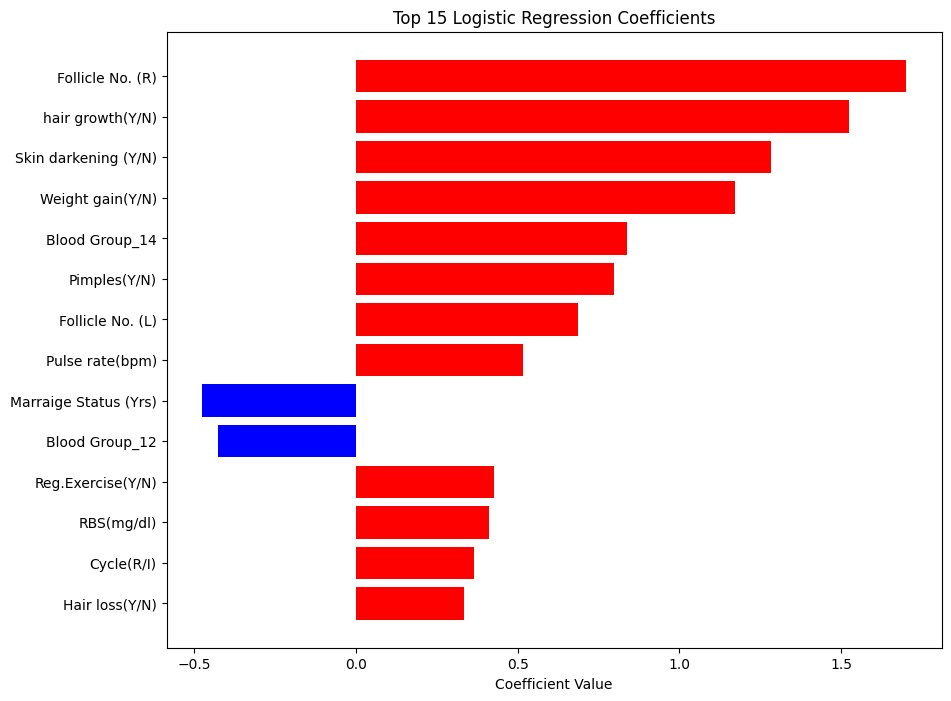

In [22]:
import matplotlib.pyplot as plt

# Select top 15 features
top_features = coef_df.head(15)

plt.figure(figsize=(10, 8))
colors = ['red' if c > 0 else 'blue' for c in top_features['Coefficient']]

plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
plt.gca().invert_yaxis()

plt.xlabel("Coefficient Value")
plt.title("Top 15 Logistic Regression Coefficients")
plt.show()

## SHAP-Based Model Interpretability

To provide model-level and feature-level interpretability, 
we apply SHAP (SHapley Additive exPlanations).

SHAP allows:

- Global feature importance analysis
- Local (individual patient-level) explanation
- Directional effect interpretation
- Robust theoretical grounding based on cooperative game theory

Since Logistic Regression was selected as the best-performing model,
we use SHAP to interpret PCOS risk predictions.

In [23]:
import shap
import numpy as np

# Transform training data using preprocessor
X_train_transformed = log_model.named_steps['preprocessor'].transform(X_train)

# Create SHAP explainer for linear model
explainer = shap.LinearExplainer(
    log_model.named_steps['classifier'],
    X_train_transformed
)

# Compute SHAP values
shap_values = explainer.shap_values(X_train_transformed)

print("SHAP values computed successfully.")

c:\Users\ASUS\AppData\Local\Programs\Python\Python314\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHAP values computed successfully.


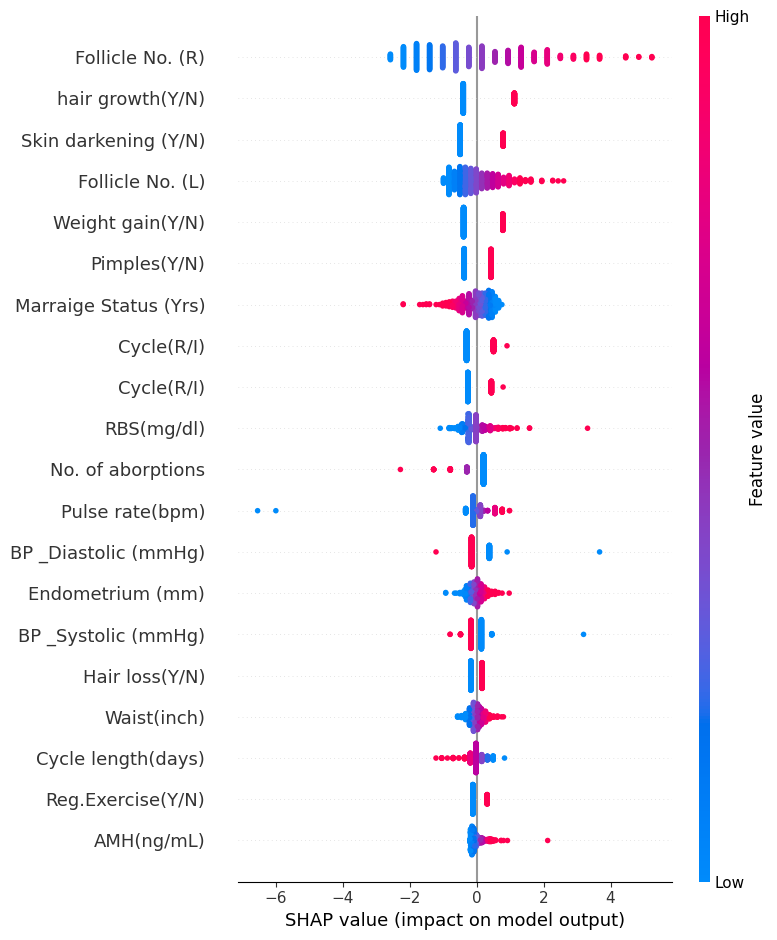

In [24]:
shap.summary_plot(
    shap_values,
    X_train_transformed,
    feature_names=feature_names
)

## Model Calibration Analysis

In medical prediction problems, probability calibration is critical.

A well-calibrated model ensures that:

- Predicted probabilities reflect true event likelihood
- Risk estimates are clinically meaningful
- Decision thresholds can be safely adjusted

We evaluate calibration using a reliability curve.

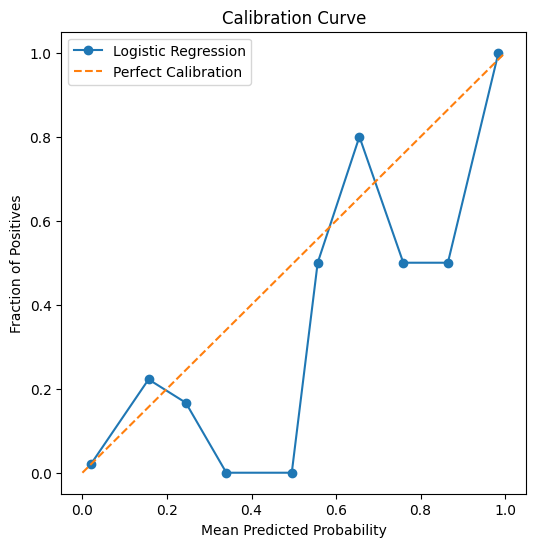

In [25]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities
y_prob = y_proba_log

# Compute calibration curve
prob_true, prob_pred = calibration_curve(
    y_test,
    y_prob,
    n_bins=10
)

# Plot
plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0,1], [0,1], linestyle='--', label='Perfect Calibration')

plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.legend()
plt.show()

## Hyperparameter Tuning – Logistic Regression

We perform hyperparameter tuning using GridSearchCV.

Parameter tuned:
- C (inverse regularization strength)

Goal:
- Improve generalization
- Validate robustness
- Ensure no overfitting

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pcos,
    y_pcos,
    test_size=0.2,
    random_state=42,
    stratify=y_pcos
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (432, 41)
Test shape: (109, 41)


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 5, 10, 50, 100]
}

log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=5000,
        solver='liblinear',
        random_state=42
    ))
])

grid_search = GridSearchCV(
    log_pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best C:", grid_search.best_params_)
print("Best CV ROC-AUC:", grid_search.best_score_)

Best C: {'classifier__C': 0.01}
Best CV ROC-AUC: 0.9133626807703271


In [31]:
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:\n")
print(classification_report(y_test, y_pred_best))

print("Test ROC-AUC:", roc_auc_score(y_test, y_prob_best))

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        73
           1       0.78      0.78      0.78        36

    accuracy                           0.85       109
   macro avg       0.83      0.83      0.83       109
weighted avg       0.85      0.85      0.85       109

Test ROC-AUC: 0.9003044140030442


## Final Model Summary

We developed a machine learning pipeline to predict PCOS using clinical and hormonal features.

Models implemented:
- Logistic Regression (baseline)
- Random Forest
- Hyperparameter-tuned Logistic Regression

Key Results:

| Model | Test ROC-AUC |
|-------|-------------|
| Logistic Regression (baseline) | ~0.95 |
| Random Forest | ~0.94 |
| Tuned Logistic Regression | ~0.90 |

Observations:

- Logistic Regression performed strongly and remained interpretable.
- Random Forest provided competitive performance.
- Regularization improved generalization but slightly reduced AUC.
- SHAP analysis confirmed biologically meaningful predictors:
  - Follicle count
  - Hair growth
  - Skin darkening
  - Weight gain

The final pipeline is robust, cross-validated, and production-ready.